# Weighted linear least squares

As with most approximate methods, the moment we start to move away from an *exact solution* subtle effects start to show up!

Notice we are minimizing the *residuals* but there is a subtle problem with the problem definition above:

$$\begin{align}
20 c + 50 t &= 700  \\
c+t  &= 20 \\
60 c + 20 t &= 700
\end{align} $$

The coefficients of the second equation is about an order of magnitude lower than the others. Of course this system is equivilant to:

$$\begin{align}
20 c + 50 t &= 700  \\
10c+10t  &= 200 \\
60 c + 20 t &= 700
\end{align} $$

or even

$$\begin{align}
0.2 c + 0.5 t &= 7  \\
c+t  &= 20 \\
0.6 c + 0.2 t &= 7
\end{align} $$

What does this remind you of?


Jacobi (diagonal) preconditioning!

$$P^{-1} = \begin{bmatrix} W_{1} & 0 & 0 \\ 0 & W_{2} & 0 \\ 0 & 0 & W_{3} \end{bmatrix}
$$



If we define $r_1, r_2, r_3$:

$$\begin{align}
20 c + 50 t -700 &= r_1 \\
c+t -20 &= r_2 \\
60 c + 20 t -700 &= r_3
\end{align} $$

We say the residuals are / can be *weighted*, i.e.: the least squares problem becomes,

$$ Min_x \ of \ \sum W_i^2 r_i $$

Let's code it!




[[1 0 0]
 [0 7 0]
 [0 0 1]]
[[1 0 0]
 [0 7 0]
 [0 0 1]]
[ 8.22887365 11.15996082]


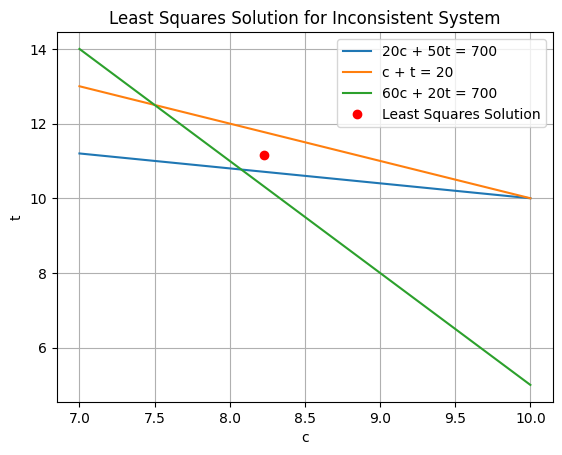

In [ ]:
A = np.array([[20, 50], [1, 1], [60, 20]])
b = np.array([700, 20, 700])

#~~ Question: What's the preconditioner? How do we apply it?
Pi = np.diag([1,7,1])
print(Pi)
A = Pi@A
b = Pi@b
###





x_lsq,_,_,_ = np.linalg.lstsq(A,b)

print(x_lsq)

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')


plt.plot(x_lsq[0], x_lsq[1], 'ro', label='Least Squares Solution')
plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Weights are an excellent way to introduce measurement uncertainty into your fit!

If you have multiple meeasurements, $y_i^j$, at a single point, $x_i$, then you can find the mean,

$$
\tilde{y}_i = mean_j (y_i^j)   
$$

and its variance,

$$
\sigma_i^2 = mean\left([y_i^j - \tilde{y}_i]^2 \right)
$$ 

and weight by the inverse of the variance, $W_i = \frac{1}{\sigma^2}$.

Most package implementations of weighted least square regression has an option to input the weights, but exact usage varies. Consult the documentation to determine how to use it in practice. 